# Sea Animals Image Classification Project

https://www.kaggle.com/datasets/markdaniellampa/fish-dataset


https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste


https://www.kaggle.com/datasets/giannisgeorgiou/fish-species

### Member
 - 6310401009 ณัฐภัทร สุดประเสริฐ
 - 6310401165 วิศรุต หอมแก่นจันทร์

# Import

In [67]:
import os 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random

# Model
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D

# Data path and classes

In [68]:
data = "sea-animal-image"
classes = sorted(os.listdir(data))
classes

['Corals',
 'Crabs',
 'Dolphin',
 'Eel',
 'Jelly Fish',
 'Lobster',
 'Nudibranchs',
 'Octopus',
 'Penguin',
 'Puffers',
 'Sea Rays',
 'Sea Urchins',
 'Seahorse',
 'Seal',
 'Sharks',
 'Squid',
 'Starfish',
 'Turtle_Tortoise',
 'Whale']

# Classes Info

In [69]:
classes_info = {}
for name in classes:
    classes_info[name] = len(os.listdir(data + f'/{name}'))
print(classes_info)

{'Corals': 553, 'Crabs': 499, 'Dolphin': 782, 'Eel': 497, 'Jelly Fish': 855, 'Lobster': 499, 'Nudibranchs': 500, 'Octopus': 562, 'Penguin': 482, 'Puffers': 531, 'Sea Rays': 517, 'Sea Urchins': 579, 'Seahorse': 478, 'Seal': 414, 'Sharks': 590, 'Squid': 483, 'Starfish': 499, 'Turtle_Tortoise': 588, 'Whale': 572}


In [70]:
fig = px.bar(x=classes_info.keys(),y=classes_info.values(),title='Classes Info ')
fig.show()

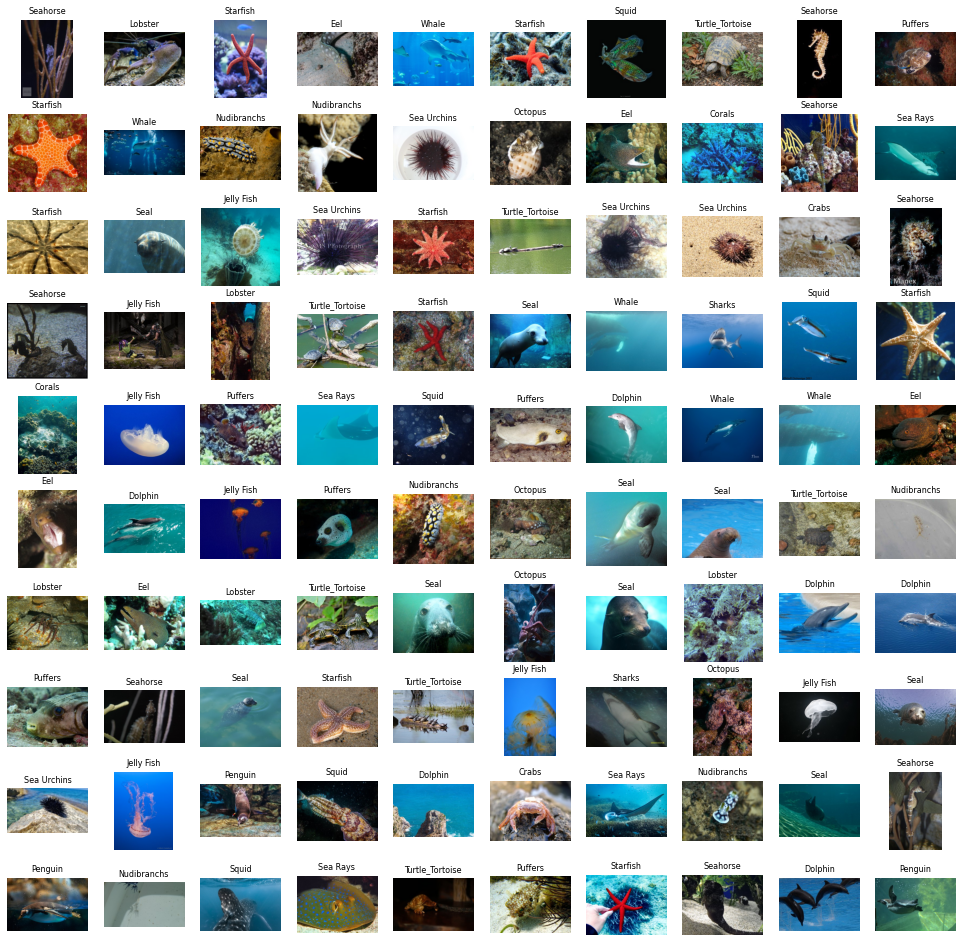

In [71]:
# visualize the training data
W = 10
H = 10
fig, axes = plt.subplots(W, H, figsize = (17,17))

axes = axes.ravel() # flaten the matrix into array

# Select a random number from 0 to n_training/ images will be selected randomly
for i in np.arange(0, W * H): 
    
    # Select a class randomly
    label = random.choice(os.listdir(data))
    class_dir = os.path.join(data,label)
    
    # Select a random image
    image = random.choice(os.listdir(class_dir))
    
    # read and display an image with the selected index    
    img = plt.imread(os.path.join(class_dir,image))
    axes[i].imshow( img )
    axes[i].set_title(label, fontsize = 8) # the label
    axes[i].axis('off')

# Data Splitting

In [72]:
train_val_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    zoom_range = 0.2,
    validation_split = 0.1
)

test_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


# datasets

training_set = train_val_gen.flow_from_directory(
    data,
    target_size=(200,200),
    batch_size=32,
    shuffle = True,
    class_mode= 'categorical',
    subset = 'training'
)

validation_set = train_val_gen.flow_from_directory(
    data,
    target_size=(200,200),
    batch_size=32,
    shuffle = True,
    class_mode= 'categorical',
    subset = 'validation'
)

test_set = test_gen.flow_from_directory(
    data,
    target_size=(200,200),
    batch_size=32,
    shuffle = True,
    class_mode= 'categorical' ,
    subset = 'validation'
)

Found 9441 images belonging to 19 classes.
Found 1039 images belonging to 19 classes.
Found 2087 images belonging to 19 classes.


In [73]:
training_set.class_indices

{'Corals': 0,
 'Crabs': 1,
 'Dolphin': 2,
 'Eel': 3,
 'Jelly Fish': 4,
 'Lobster': 5,
 'Nudibranchs': 6,
 'Octopus': 7,
 'Penguin': 8,
 'Puffers': 9,
 'Sea Rays': 10,
 'Sea Urchins': 11,
 'Seahorse': 12,
 'Seal': 13,
 'Sharks': 14,
 'Squid': 15,
 'Starfish': 16,
 'Turtle_Tortoise': 17,
 'Whale': 18}

In [74]:
training_set[0][0].shape

(32, 200, 200, 3)